In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

[datetime.datetime(1900, 1, 1, 12, 14), datetime.datetime(1900, 1, 1, 12, 56), datetime.datetime(1900, 1, 1, 13, 31), datetime.datetime(1900, 1, 1, 14, 22)]
[[6.8400e-09 2.0800e-09 3.3325e-08 8.0000e-08]
 [3.7800e-09 1.9000e-09 3.9990e-08 9.0000e-08]
 [4.3200e-09 1.4000e-09 3.3325e-08 1.0000e-07]
 [3.6600e-09 1.6600e-09 4.6655e-08 1.0000e-07]]


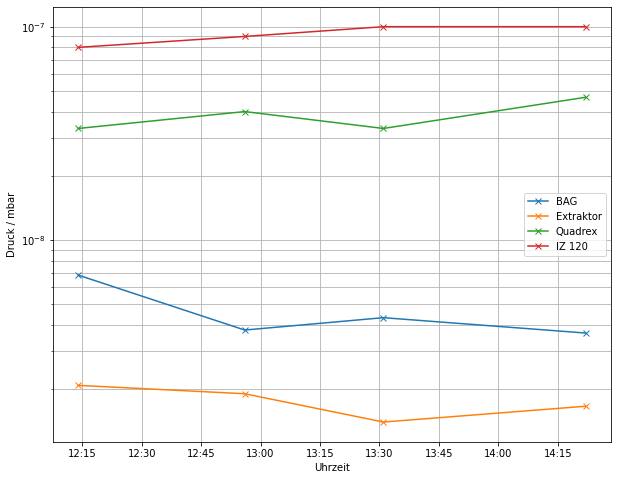

In [2]:
# Comparison of vaccum measurement devices
filename = 'data/Messwerte Versuch 5 - Messröhren Vergleich.csv'

with open(filename, 'r') as f:
    date_arr = [
        datetime.strptime(line.split(',')[0], "%H:%M")
        for line in f.readlines()[1:]
    ]
print(date_arr)

p_arr = np.genfromtxt(
    fname=filename,
    skip_header=1,
    delimiter=",",
    usecols=[1, 2, 3, 4]
)
# Convert torr to mbar
p_arr[:, 2] *= 1.333
print(p_arr)

labels = ["BAG", "Extraktor","Quadrex", "IZ 120"]

fig, ax = plt.subplots(figsize=[10, 8])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.grid(which='both')
ax.set_xlabel("Uhrzeit")
ax.set_ylabel("Druck / mbar")
ax.set_yscale('log')

for i, label in enumerate(labels):
    ax.plot(date_arr, p_arr[:, i], 'x-', label=label)

ax.legend()
fig.savefig("figs/messroehrenverglich.pdf", bbox_inches='tight')

[3.0, 5.0, 9.0, 11.0, 15.0, 19.0, 25.0]


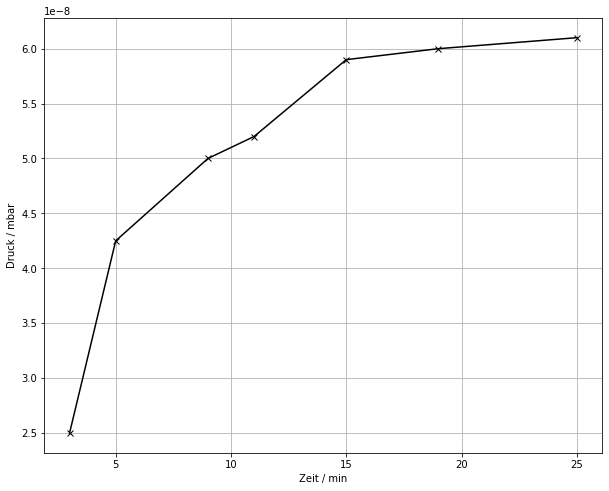

In [13]:
# Argon Backdiffusion
filename = 'data/Messwerte Versuch 5 - Argon-Rückdiffusion.csv'

# Time when the pump was stopped
cuttof_time = datetime.strptime("15:05", "%H:%M")

with open(filename, 'r') as f:
    date_arr = [
        (datetime.strptime(line.split(',')[0], "%H:%M") - cuttof_time).seconds / 60
        for line in f.readlines()[1:]
    ]
print(date_arr)

p_arr = np.genfromtxt(
    fname=filename,
    skip_header=1,
    delimiter=",",
    usecols=[1]
)

fig, ax = plt.subplots(figsize=[10, 8])
ax.grid(which='both')
ax.set_xlabel("Zeit / min")
ax.set_ylabel("Druck / mbar")
#ax.set_yscale('log')

ax.plot(date_arr, p_arr, 'kx-')
fig.savefig("figs/argon-rueckdiffusion.pdf", bbox_inches='tight')
